In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 13
%matplotlib inline

# 비지도학습 - 클러스터링(군집화)
Clustering이란 여러 개의 데이터가 있을 때 군집화 하는 것을 의미한다.
비슷한 데이터끼리 묶어놓으면 관리하기 쉬운 장점이 있다. 예를 들면 학원을 운영할 때 고급반, 중급반, 초급반으로 분류해서 관리한다면 활용 방안이 많아질 것이다.
비지도학습(Unsupervised Learning) 알고리즘은 정확한 방향성이 일치하지 않더라도 알아서 학습이 가능한 알고리즘으로 데이터를 군집화하는 알고리즘이 비지도학습에 속한다. → KMeans 알고리즘이 대표적인 비지도학습 알고리즘

In [2]:
# clustering(군집화)에 필요한 라이브러리를 import 한다.
# !conda install scikit-learn
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('./data/cluster.csv', sep=',')
df.head()

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7


In [4]:
# index(): 데이터프레임의 인덱스를 얻어온다.
print(df.index)
print(list(df.index))

RangeIndex(start=0, stop=30, step=1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [5]:
# column: 데이터프레임의 컬럼 이름을 얻어온다.
df.columns

Index(['x', 'y'], dtype='object')

In [6]:
# values: 데이터프레임에 저장된 데이터만 numpy 배열 형태로 얻어온다.
print(type(df.values))
df.values

<class 'numpy.ndarray'>


array([[ 2,  3],
       [ 2, 11],
       [ 2, 18],
       [ 4,  5],
       [ 4,  7],
       [ 5,  3],
       [ 5, 15],
       [ 6,  6],
       [ 6,  8],
       [ 6,  9],
       [ 7,  2],
       [ 7,  4],
       [ 7,  5],
       [ 7, 17],
       [ 7, 18],
       [ 8,  5],
       [ 8,  4],
       [ 9, 10],
       [ 9, 11],
       [ 9, 15],
       [ 9, 19],
       [10,  5],
       [10,  8],
       [10, 18],
       [12,  6],
       [13,  5],
       [14, 11],
       [15,  6],
       [15, 18],
       [18, 12]])

Clustering을 실행할 데이터를 시각화한다.

Text(0.5, 1.0, 'KMeans 시각화')

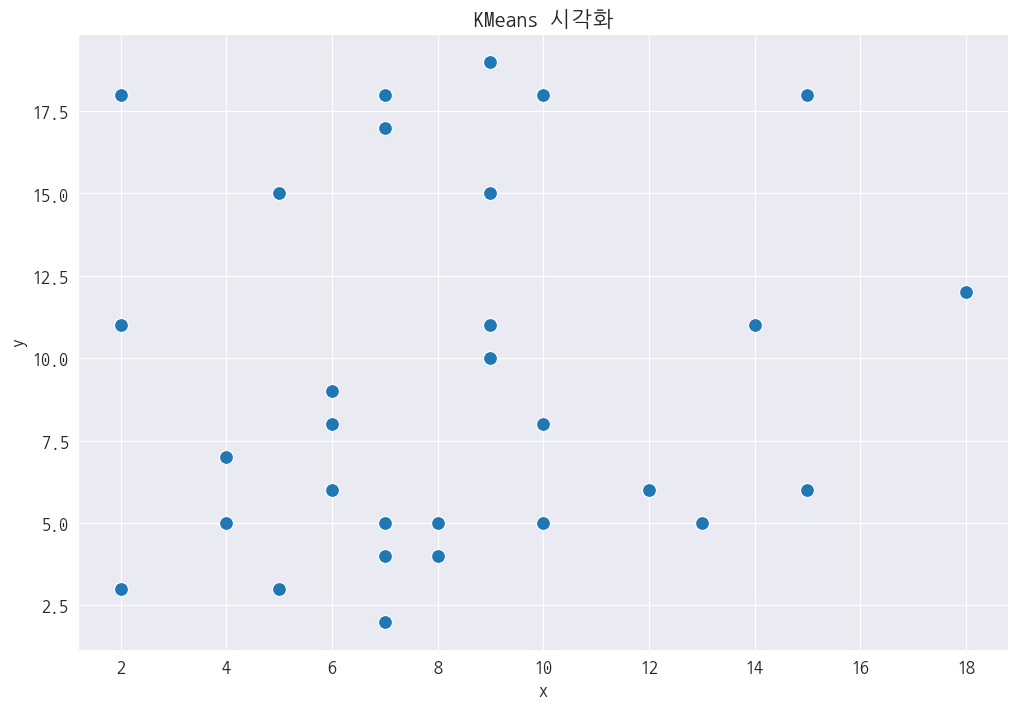

In [7]:
plt.figure(figsize=([12, 8]))
sns.scatterplot(data=df, x='x', y='y', s=100)
plt.title('KMeans 시각화')
# plt.xlabel('x축')
# plt.ylabel('y축')

KMeans를 수행하기 위해서는 클러스터링을 수행할 데이터의 주제를 결정하고 얼마나 많은 클러스터를 만들지 결정한다.
이 때, 데이터가 정확하고 많을수록 유리하게 클러스터링을 할 수 있다.
클러스터링을 수행하는 방법은 무작위 중심(centroid)값 선택, KMeans++법 등 다양한 방법이 있다.

# 무작위 중심(Centroid)값 선택 알고리즘을 이용한 클러스터링
중심에 가까운 데이터를 클러스터에 포함시키고 중심을 클러스터의 중앙으로 이동시키는 과정을 반복해서 수행하면 되는데 더 이상 중심의 위치가 변하지 않을 때까지 반복하는 것이 일반적인 방법이고 이러한 과정을 거치면 결과적으로 완벽하게 군집화된 클러스터를 얻을 수 있다.

# 클러스터링을 위한 무작위 중심을 결정하는 방법<br />
<img src="images/Clustering1.png" width="1800" /><br />
1. 가장 먼저 특정 노드(데이터)를 선택해서 클러스터의 중심으로 설정(파랑색)한다.<br />
2. 그 후에는 선택된 노드(파랑색)에서 가장 먼 노드(노랑색)를 두 번째 클러스터의 중심으로 설정한다.<br />
3. 그 다음부터는 이미 선택된 중심점들로부터 가장 멀리 떨어져있는 노드(녹색)를 선택해서 클러스터의 중심으로 설정한다.

<img src="images/Clustering2.png" width="1800" /><br />
1, 2, 3 세 개의 클러스터가 존재한다고 가정하고 하나의 데이터를 선택해서 세 개의 클러스터 중심 중에서 가장 가까운 클러스터에 속하도록 만드는 작업을 반복해서 실행한다.<br />
이러한 과정을 전체 데이터에 대하여 실행하면 아래 그림과 같을 것이다.

<img src="images/Clustering3.png" width="1800" /><br />
대략적으로 군집화가 완료되면 완벽한 군집화를 위해 중심의 위치를 데이터의 중간으로 이동시킨다.<br />
중심의 위치를 이동시키고 다시 모든 데이터에 대해서 어떤 클러스터에 가까운지를 하나씩 체크한 뒤 만약 특정 데이터가 다른 클러스터의 중심에 더 가깝다면 그 클러스터에 속하도록 설정하면 된다.<br />
클러스터 중심의 위치가 더 이상 바뀌지 않으면 클러스터링이 끝난다.

KMeans 알고리즘을 이용해서 클러스터 4개를 생성한다.

In [8]:
# sklearn 라이브러리의 KMeans() 메서드를 이용해서 데이터프레임의 데이터를 학습시킨다.
# KMeans() 메서드의 n_clusters 속성으로 군집화 할 클러스터의 개수를 지정하고
kmeans = KMeans(n_clusters=4).fit(df)
print(kmeans)
# cluster_centers_: KMeans() 메서드가 계산한 클러스터의 중심 위치를 얻어온다.
print(kmeans.cluster_centers_)
# labels_: KMeans() 메서드가 계산한 데이터가 속하는 각각의 클러스터를 얻어온다.
print(kmeans.labels_)

KMeans(n_clusters=4)
[[ 5.53846154  5.53846154]
 [ 7.         17.14285714]
 [15.66666667 13.66666667]
 [11.14285714  7.28571429]]
[0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 3 3 1 1 3 3 1 3 3 2 3 2 2]


데이터프레임에 cluster라는 열을 추가하고 군집화된 결과를 넣어준다.

In [9]:
df['cluster'] = kmeans.labels_
df

,x,y,cluster
0,2,3,0
1,2,11,0
2,2,18,1
3,4,5,0
4,4,7,0
5,5,3,0
6,5,15,1
7,6,6,0
8,6,8,0
9,6,9,0


In [10]:
# 데이터프레임을 csv 파일로 저장한다.
df.to_csv('./data/cluster_save.csv', sep=',')

Text(0, 0.5, 'y축')

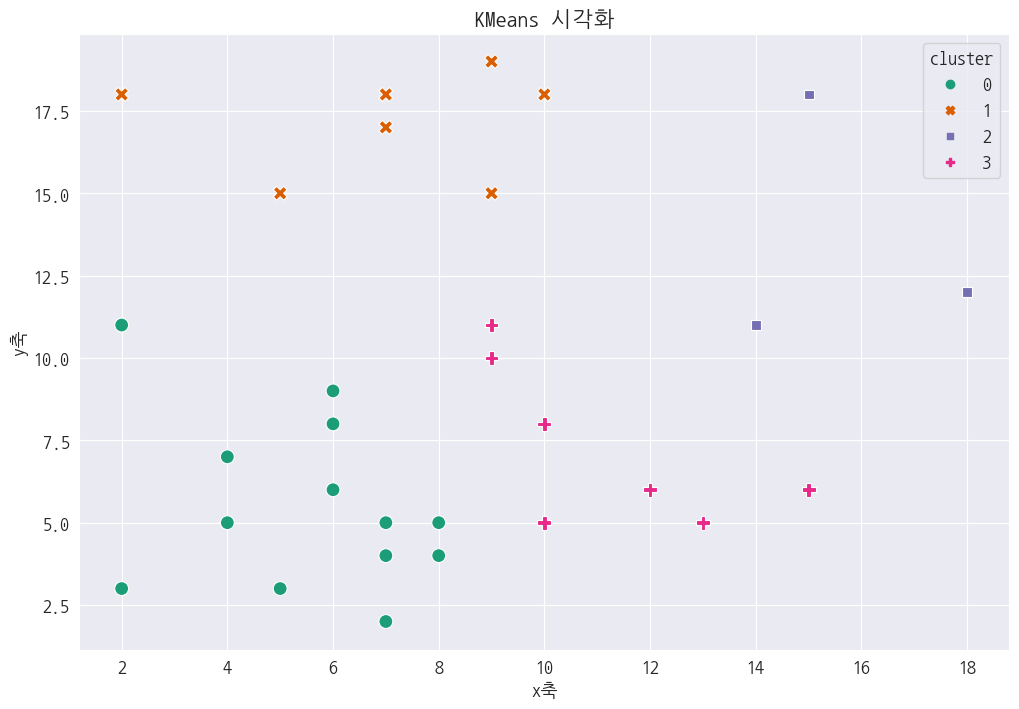

In [11]:
# 클러스터링된 데이터를 시각화한다.
plt.figure(figsize=[12, 8])
# 군집화된 결과를 hue 속성에 지정해서 색깔로 구분한다.
# 색상이 잘 구분되지 않으면 팔레트를 지정한다.
sns.scatterplot(data=df, x='x', y='y', s=100, hue='cluster', palette='Dark2', style='cluster')
plt.title('KMeans 시각화')
plt.xlabel('x축')
plt.ylabel('y축')